Данная работа представляет собой техническую реализацию статьи https://www.tandfonline.com/doi/abs/10.1080/002075400189004

Основная научная новизна этой работы состоит в том, что в статье описаны теоретические аспекты задачи, и она не является описанием для реализации, то есть по ней сразу написать рабочую систему нельзя. Автор данной работы предлагает некоторые свои идеи по реализации, а так же решает возникающие технические проблемы, так что метод, предложенный F. Blomer & H.-O. Gunther, оказывается применимым на практике.

Задача бенчмарка на хим. производстве имеет важное практическое значение, так как позволяет эффективно планировать ресурсы и запуски процессов, чтобы достичь требуемых результатов, как, например, доходы, минимизацию затраченного времени или другие параметры.

Авторы статьи, как и многие другие исследователи, решают классическую задачу бенчмарка, предложенную в 1994 году Westenberger and Kallrath.

Задача в своей первоначальной постановке формулируется так: пусть у нас есть завод, который из сырья $P_0$ производит 5 конечных продуктов $P_{7,1}, P_{7,2}, P_{7,3}, P_{7,4}, P_{7,5}$.

Мы будем вслед за авторами статьи решать задачу минимизации суммарного времени работы системы. Если не вдаваться в подробности, то у нас есть "узлы" двух типов: хранилища веществ и узлы по переработке. Вещества проходят несколько стадий перед получением финальных продуктов, и каждая стадия обрабатывает свое количество вещества за свой промежуток времени.


Итак, введем переменные:

1) Есть $U$ узлов $u \in \{1,..,U\}$ по переработке веществ. 

2) На каждом узле $u$ есть $L_u$ производственных лент. Они и занимаются переработкой вещества, причем они неравнозначны.

3) Каждая лента может параллельно заниматься производством нескольких продуктов. Через $P_l$ будем обозначать продукты, которые она умеет производить.

3) Каждая лента $l$ производит продукт $p$ за $t_{l, p}$ единиц времени (примечание автора: в оригинальной постановке время измерялось в доле от суток, но гораздо удобнее считать его целочисленным и измерять в тактах, где такт - некоторая единица времени, такая, что все процессы работают целое число тактов. Подробнее можно прочитать в оригинальной статье). Это известная величина.

4) Для каждого продукта, который лента умеет производить, известен рецепт. Он состоит из не более двух ингредиентов (в случае, если ингредиентов два, мы знаем соотношение, в котором их нужно взять) и не более двух продуктов (может так случиться, что есть побочный продукт и мы знаем соотношение масс).

5) Лента может на каждом шаге взять некоторый батч массы на производство. Известны ограничения на размеры батча, который может обработаться за один запуск узла. Известно, что время работы узла от размера батча не зависит. Размер батча на каждом запуске является переменной и может быть выбран (по нему идет оптимизация).

6) Известно, что некоторые продукты могут перерабатываться в другие (как например $P_{3,1}$ это то же химическое вещество, что и $P_{1,1}$, так что его можно обработать снова).

7) Продукты между обработкой (кроме финальных продуктов) хранятся на складе. Известны ограничения на склад в каждый момент времени. Есть продукты, которые хранить нельзя вообще. Автор работы предлагает их не рассматривать отдельно, но добавлять требование, что максимальный размер склада это 0.

Итак, нам разрешено выбирать, когда запускать узлы, а так же какой размер батча вещества брать. Считая, что сырья у нас достаточно и что нам нужно получить требуемое количество финального продукта, нужно получить его как можно быстрее.

Замечание: в оригинальной задаче рассматриваются клининговые процессы на узлах, но вслед за авторами статьи, мы будем считать, что они включены во время обработки.

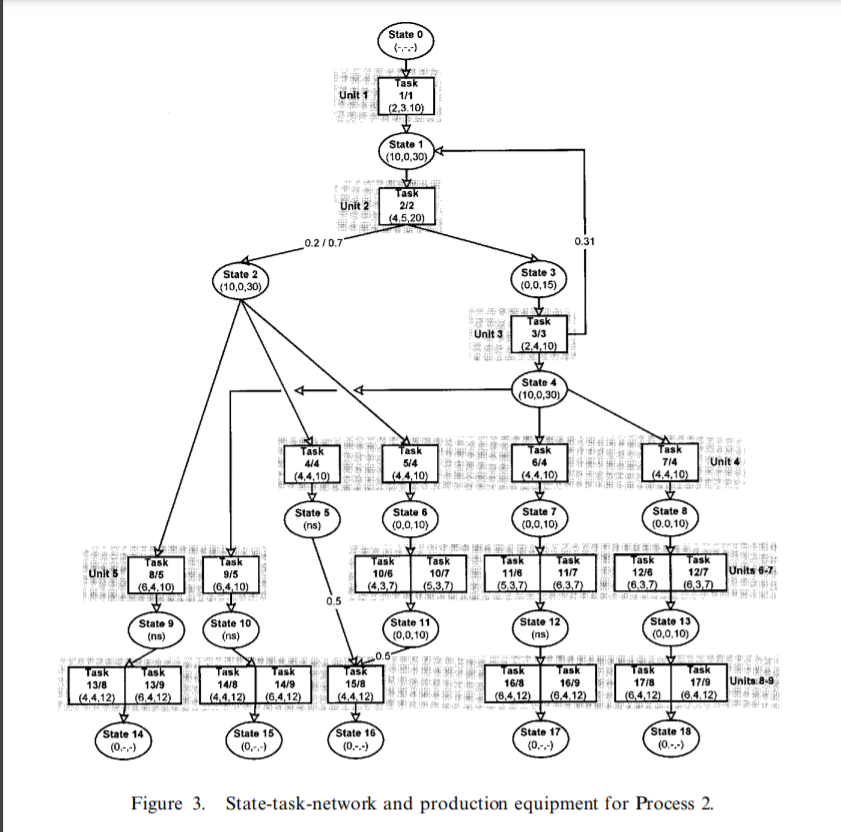

Кругами на картинке обозначены складские узлы, а прямоугольниками - производственные ленты. Двойные прямоугольники - это узлы, на которых есть несколько лент.

Итак, задача поставлена. Нам бы хотелось уметь ее решать методами линейного программирования, а значит ее надо написать в линейной форме.

Основная проблема этой задачи состоит в том, что нужно уметь записывать ограничения на текущие составы складов, которые являются функциями от времени. А время является переменной, то есть у нас есть целая переменная функция. Первое наблюдение состоит в том, что нам достаточно требовать ограничения на размер склада только в моменты запусков и окончаний работы узлов-производителей. Тогда мы можем рассмотреть несколько переменных, отражающих заполненность склада в эти моменты.

Вторая проблема состоит в том, что времена запуска и остановки являются переменными и зависят от того, какой размер батчей мы захотим взять. То есть, мы не знаем, каким временам соответствуют переменные склада. Авторы статьи говорят, что уравнение склада записывается с использованием пороговой функции Хевисайда (то есть объем вещества на складе - это количество ранее добавленного вещества минус количество ранее взятого вещества), однако функция Хевисайда не является линейной.

Предлагаемым решением в первом приближении было поделить непрерывную сетку времени на такты. В силу того, что такт является минимальной единицей времени и все времена работы узлов есть целочисленное число тактов, то мы не теряем в оптимальности - если выгодно запускать узел между тактами, то выгодно и в начале соотвествующего такта, так как время окончания работы предыдущего узла необходимо целочисленное.

Тогда можно потребовать то, что мы ограничиваем число запусков (можно грубо оценить за какое число запусков мы точно сможем получить требуемый продукт) и знание о том, что некоторая лента запускается $n$-тый раз в момент времени $t$, сохранить в индикаторной бинарной переменной, и оптимизировать по ней.

Тогда состояние склада в каждый момент времени является переменной и легко выражается: состояние склада в текущий момент времени - это состояние в предыдущий плюс сумма батчей, которые мы забрали или получили в этот момент.

Узнать, сколько массы пришло и ушло просто - это будет переменная $\alpha_{t, n}$, которая выражает потребление массы некоторым узлом в момент времени $t$ на запуск $n$. Нетрудно составить ограничения о том, что она может быть ненулевой, только если запуск состоялся ровно в это время (что отражает индикатор).

Таким образом, записывая аккуратно все ограничения на индикаторы, мы получаем задачу в линейной форме (перед этим сделав верхние оценки на время работы и число запусков).

Основная проблема, с которой борятся ученые, исследующие эту задачу - большое число переменных, что делает задачу трудноразрешимой. При 25 тактах времени, 4 одноленточных узлах и 20 запусках мы получаем уже больше 2000 переменных, что не позволяет решить задачу даже при больших ресурсах.

Авторы статьи предлагают двухступенчатую схему для подхода к этой задаче.

Первая часть схемы подразумевает создание разряженной сетки времени. Предлагается делать по переменной не на такт, а на некоторое число тактов, причем подобранное так, чтобы некоторые узлы могли завершаться за целочисленное число единиц новой шкалы времени. Тогда узлам разрешается начинать запуски только во времена, обозначенные на новой шкале. 

In [ ]:
!pip install pulp

     |████████████████████████████████| 40.6MB 108kB/s 


Часть 1: разреженная сетка времени

In [ ]:
import numpy as np
from pulp import *

model = LpProblem("The_benchmark_problem_sparse_time", LpMinimize)

MAX_RUNS = 12 # количество задач, которые нужно выполнить на каждом узле
MAX_TIME = 17 # верхняя граница на количество тактов времени
multiplier = 6
times = [i*multiplier for i in range(MAX_TIME)]
num_times = dict()
for i in range(MAX_TIME):
    num_times[times[i]] = i

units = [dict(), dict(), dict(), dict(), dict(), dict(), dict()]
units[0]["lines"] = [dict()]
units[0]["lines"][0]["products"] = [dict()] #product P_1,1

units[1]["lines"] = [dict()]
units[1]["lines"][0]["products"] = [dict(), dict()] #product P_2,1, P_2,2

units[2]["lines"] = [dict()]
units[2]["lines"][0]["products"] = [dict(), dict()] #product P_3,1, P_3,2

units[3]["lines"] = [dict()]
units[3]["lines"][0]["products"] = [dict(), dict(), dict(), dict()] #product P_4,1, P_4,2, P_4,3, P_4,4

units[4]["lines"] = [dict()]
units[4]["lines"][0]["products"] = [dict(), dict()] #product P_5,1, P_5,2

units[5]["lines"] = [dict(), dict()]
units[5]["lines"][0]["products"] = [dict(), dict(), dict()] #product P_6,1, P_6,2, P_6,3
units[5]["lines"][1]["products"] = [dict(), dict(), dict()] #product P_6,1, P_6,2, P_6,3

units[6]["lines"] = [dict(), dict()]
#product P_7,1, P_7,2, P_7,3, P_7,4, P_7,5
units[6]["lines"][0]["products"] = [dict(), dict(), dict(), dict(), dict()] 
#product P_7,1, P_7,2, P_7,4, P_7,5
units[6]["lines"][1]["products"] = {0: dict(), 1: dict(), 3: dict(), 4: dict()}

#time not in days, but in time units
units[0]["lines"][0]["products"][0]["time"] = 2

units[1]["lines"][0]["products"][0]["time"] = 4
units[1]["lines"][0]["products"][1]["time"] = 4

units[2]["lines"][0]["products"][0]["time"] = 2
units[2]["lines"][0]["products"][1]["time"] = 2

units[3]["lines"][0]["products"][0]["time"] = 4
units[3]["lines"][0]["products"][1]["time"] = 4
units[3]["lines"][0]["products"][2]["time"] = 4
units[3]["lines"][0]["products"][3]["time"] = 4

units[4]["lines"][0]["products"][0]["time"] = 6
units[4]["lines"][0]["products"][1]["time"] = 6

units[5]["lines"][0]["products"][0]["time"] = 4
units[5]["lines"][1]["products"][0]["time"] = 5
units[5]["lines"][0]["products"][1]["time"] = 5
units[5]["lines"][1]["products"][1]["time"] = 6
units[5]["lines"][0]["products"][2]["time"] = 6
units[5]["lines"][1]["products"][2]["time"] = 6

units[6]["lines"][0]["products"][0]["time"] = 4
units[6]["lines"][1]["products"][0]["time"] = 6
units[6]["lines"][0]["products"][1]["time"] = 4
units[6]["lines"][1]["products"][1]["time"] = 6
units[6]["lines"][0]["products"][2]["time"] = 4
units[6]["lines"][0]["products"][3]["time"] = 6
units[6]["lines"][1]["products"][3]["time"] = 6
units[6]["lines"][0]["products"][4]["time"] = 6
units[6]["lines"][1]["products"][4]["time"] = 6

units[0]["min_batch_size"] = 3
units[0]["max_batch_size"] = 10

units[1]["min_batch_size"] = 5
units[1]["max_batch_size"] = 20

units[2]["min_batch_size"] = 4
units[2]["max_batch_size"] = 10

units[3]["min_batch_size"] = 4
units[3]["max_batch_size"] = 10

units[4]["min_batch_size"] = 4
units[4]["max_batch_size"] = 10

units[5]["min_batch_size"] = 3
units[5]["max_batch_size"] = 7

units[6]["min_batch_size"] = 4
units[6]["max_batch_size"] = 12

stockmax = [[30], [30, 15], [30, 0], [0, 10, 10, 10], [0, 0], [10, 0, 10]]


#variables
units[0]["lines"][0]["products"][0]["vars"] = dict()

units[1]["lines"][0]["products"][0]["vars"] = dict()
units[1]["lines"][0]["products"][1]["vars"] = dict()

units[2]["lines"][0]["products"][0]["vars"] = dict()
units[2]["lines"][0]["products"][1]["vars"] = dict()

units[3]["lines"][0]["products"][0]["vars"] = dict()
units[3]["lines"][0]["products"][1]["vars"] = dict()
units[3]["lines"][0]["products"][2]["vars"] = dict()
units[3]["lines"][0]["products"][3]["vars"] = dict()

units[4]["lines"][0]["products"][0]["vars"] = dict()
units[4]["lines"][0]["products"][1]["vars"] = dict()

units[5]["lines"][0]["products"][0]["vars"] = dict()
units[5]["lines"][1]["products"][0]["vars"] = dict()
units[5]["lines"][0]["products"][1]["vars"] = dict()
units[5]["lines"][1]["products"][1]["vars"] = dict()
units[5]["lines"][0]["products"][2]["vars"] = dict()
units[5]["lines"][1]["products"][2]["vars"] = dict()

units[6]["lines"][0]["products"][0]["vars"] = dict()
units[6]["lines"][1]["products"][0]["vars"] = dict()
units[6]["lines"][0]["products"][1]["vars"] = dict()
units[6]["lines"][1]["products"][1]["vars"] = dict()
units[6]["lines"][0]["products"][2]["vars"] = dict()
units[6]["lines"][0]["products"][3]["vars"] = dict()
units[6]["lines"][1]["products"][3]["vars"] = dict()
units[6]["lines"][0]["products"][4]["vars"] = dict()
units[6]["lines"][1]["products"][4]["vars"] = dict()

units[0]["vars"] = dict()
units[1]["vars"] = dict()
units[2]["vars"] = dict()
units[3]["vars"] = dict()
units[4]["vars"] = dict()
units[5]["vars"] = dict()
units[6]["vars"] = dict()

for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            units[i]["lines"][j]["products"][k]["vars"]["batch"] = list()
            for run in range(MAX_RUNS):
                units[i]["lines"][j]["products"][k]["vars"]["batch"] += [list()]
                for time in range(MAX_TIME):
                    units[i]["lines"][j]["products"][k]["vars"]["batch"][run].append(LpVariable(str(i)+','+
                                                                                        str(j)+','+
                                                                                        str(k)+','+str(time)+","+str(run)+
                                                                                        '-batch', cat='Continious'))

for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    units[6]["lines"][0]["products"][k]["vars"]["batch"] = list()
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["vars"]["batch"] += [list()]
        for time in range(MAX_TIME):
            units[i]["lines"][j]["products"][k]["vars"]["batch"][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(time)+","+str(run)+
                                                                                '-batch', cat='Continious'))

for k in [0, 1, 3, 4]:  
    i = 6
    j = 1
    units[6]["lines"][1]["products"][k]["vars"]["batch"] = list()
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["vars"]["batch"] += [list()]
        for time in range(MAX_TIME):
            units[i]["lines"][j]["products"][k]["vars"]["batch"][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(time)+","+str(run)+
                                                                                '-batch', cat='Continious'))
            
#variables for time indicators

for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            units[i]["lines"][j]["products"][k]["vars"]["runs"] = list()
            for run in range(MAX_RUNS):
                units[i]["lines"][j]["products"][k]["vars"]["runs"] += [list()]
                for time in range(MAX_TIME):
                    units[i]["lines"][j]["products"][k]["vars"]["runs"][run].append(LpVariable(str(i)+','+
                                                                                        str(j)+','+
                                                                                        str(k)+','+str(run)+','+str(time)+
                                                                    '-start_time_indicator', cat='Binary'))

for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    units[6]["lines"][0]["products"][k]["vars"]["runs"] = list()
    for run in range(MAX_RUNS):
        units[6]["lines"][0]["products"][k]["vars"]["runs"] += [list()]
        for time in range(MAX_TIME):
            units[6]["lines"][0]["products"][k]["vars"]["runs"][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(run)+','+str(time)+
                                                            '-start_time_indicator', cat='Binary'))
        
for k in [0, 1, 3, 4]:
    i = 6
    j = 1
    units[6]["lines"][1]["products"][k]["vars"]["runs"] = list()
    for run in range(MAX_RUNS):
        units[6]["lines"][1]["products"][k]["vars"]["runs"] += [list()]
        for time in range(MAX_TIME):
            units[6]["lines"][1]["products"][k]["vars"]["runs"][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(run)+','+str(time)+
                                                            '-start_time_indicator', cat='Binary'))

#stock variables

for i in range(6):
    units[i]["stock"] = [dict()]*len(units[i]["lines"][0]["products"])
    for k in range(len(units[i]["lines"][0]["products"])):
        units[i]["stock"][k]["vars"] = LpVariable.dicts(str(i)+','+str(k)+'-stock', range(MAX_TIME), cat='Continious')
        
#target time
end_time = LpVariable('end_time', cat='Integer')

model += 1 <= end_time
for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            for run in range(MAX_RUNS):
                for time in range(MAX_TIME):
                    model += end_time >= times[time]*units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] + units[i]["lines"][j]["products"][k]["time"] - 1

for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    for run in range(MAX_RUNS):
        for time in range(MAX_TIME):
            model += end_time >= times[time]*units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] + units[i]["lines"][j]["products"][k]["time"] - 1

        
for k in [0, 1, 3, 4]:
    i = 6
    j = 1
    for run in range(MAX_RUNS):
        for time in range(MAX_TIME):
            model += end_time >= times[time]*units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] + units[i]["lines"][j]["products"][k]["time"] - 1

            
#recycle 3,2 as 1,1
recycle = 0.6923

#fraction between 2.1 and 2.2
frac = 0.5

Тут следует сделать небольшое замечание (не учтеное авторами статьи): при записывании ограчения на заполненность складов приток массы должен вычисляться в момент времени $t-s$, где $t$ - текущее время, а $s$ - время начала операции. Тут есть небольшая проблема с тем, что $s$ может не присутствовать в нашей шкале, и мы потеряем то, что в момент $s$ могли произвести. Но тут можно вспомнить, что начать запуск можно только в моменты времени, обозначенные на шкале. То есть, если процесс не начали во время $s$, то его начали в близжайший момент времени на шкале, который был до $s$ (если его начали еще раньше, то мы учли этот приток на предыдущих отметках времени в переменных склада). Тогда самой простой реализацией является такая: новая сетка времени содержит те и только те отметки, которые кратны некотому числу тактов. Самым удобным оказалось брать множитель, равный максимальному времени работы.

In [ ]:
# Add constraints

for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            for run in range(MAX_RUNS):
                for time in range(MAX_TIME):
                    model += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] * units[i]["min_batch_size"] <= units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time]
                    model += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] * units[i]["max_batch_size"] >= units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time]

for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    for run in range(MAX_RUNS):
        for time in range(MAX_TIME):
            model += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] * units[6]["min_batch_size"] <= units[6]["lines"][0]["products"][k]["vars"]["batch"][run][time]
            model += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] * units[6]["max_batch_size"] >= units[6]["lines"][0]["products"][k]["vars"]["batch"][run][time]

for k in [0, 1, 3, 4]:
    i = 6
    j = 1
    for run in range(MAX_RUNS):
        for time in range(MAX_TIME):
            model += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] * units[6]["min_batch_size"] <= units[6]["lines"][1]["products"][k]["vars"]["batch"][run][time]
            model += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] * units[6]["max_batch_size"] >= units[6]["lines"][1]["products"][k]["vars"]["batch"][run][time]

#time is correct and monotonic

for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            for time in range(MAX_TIME):
                expr = 0
                for run in range(MAX_RUNS):
                    expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] 
                    time1 = time + 1
                    while time1 < MAX_TIME and times[time] + units[i]["lines"][j]["products"][k]["time"] > times[time1]:
                        expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time1]
                        time1 += 1
                model += expr <= 1
            #run is started at most once
            for run in range(MAX_RUNS):
                expr = 0
                for time in range(MAX_TIME):
                    expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time]
                model += expr <= 1


for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    for time in range(MAX_TIME):
        expr = 0
        for run in range(MAX_RUNS):
            expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] 
            time1 = time + 1
            while time1 < MAX_TIME and times[time] + units[i]["lines"][j]["products"][k]["time"] > times[time1]:
                expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time1]
                time1 += 1
        model += expr <= 1
    #run is started at most once
    for run in range(MAX_RUNS):
        expr = 0
        for time in range(MAX_TIME):
            expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time]
        model += expr <= 1
    
for k in [0, 1, 3, 4]:
    i = 6
    j = 1
    for time in range(MAX_TIME):
        expr = 0
        for run in range(MAX_RUNS):
            expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time] 
            time1 = time + 1
            while time1 < MAX_TIME and times[time] + units[i]["lines"][j]["products"][k]["time"] > times[time1]:
                expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time1]
                time1 += 1
        model += expr <= 1
    #run is started at most once
    for run in range(MAX_RUNS):
        expr = 0
        for time in range(MAX_TIME):
            expr += units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time]
        model += expr <= 1

# stock is correct

for i in range(6):
    for k in range(len(units[i]["lines"][0]["products"])):
        for time in range(MAX_TIME):
            model += 0 <= units[i]["stock"][k]["vars"][time]
            model += units[i]["stock"][k]["vars"][time] <= stockmax[i][k]



#stock is empty at the beginning

for i in range(6):
    for k in range(len(units[i]["lines"][0]["products"])):
        model += units[i]["stock"][k]["vars"][0] == 0

# for units > 1 it is not allowed to begin at the time 0 (empty stocks)
for k in range(5):
    for run in range(MAX_RUNS):
        model += units[6]["lines"][0]["products"][k]["vars"]["batch"][run][0] == 0

for k in [0, 1, 3, 4]:
    for run in range(MAX_RUNS):
        model += units[6]["lines"][1]["products"][k]["vars"]["batch"][run][0] == 0

for i in range(1, 6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            for run in range(MAX_RUNS):
                model += units[i]["lines"][j]["products"][k]["vars"]["batch"][run][0] == 0
#1,1
for time in range(1, MAX_TIME):
    income = 0
    begin_time = times[time] - units[0]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    outcome = 0
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[0]["lines"][0]["products"][0]["vars"]["batch"][run][num_times[begin_time]]

    for run in range(MAX_RUNS):
        outcome += units[1]["lines"][0]["products"][0]["vars"]["batch"][run][time]

    begin_time = times[time] - units[2]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += (1-recycle)*units[2]["lines"][0]["products"][0]["vars"]["runs"][run][num_times[begin_time]]

    model += units[0]["stock"][0]["vars"][time] == units[0]["stock"][0]["vars"][time-1] + income - outcome

#2,1
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    income = 0
    begin_time = times[time] - units[1]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += frac*units[1]["lines"][0]["products"][0]["vars"]["batch"][run][num_times[begin_time]]

    outcome = 0
    for run in range(MAX_RUNS):
        outcome += units[3]["lines"][0]["products"][0]["vars"]["batch"][run][time]
        outcome += units[3]["lines"][0]["products"][1]["vars"]["batch"][run][time]
        outcome += units[4]["lines"][0]["products"][0]["vars"]["batch"][run][time]

    model += units[1]["stock"][0]["vars"][time] == units[1]["stock"][0]["vars"][time-1] + income - outcome
    
#2,2
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    income = 0
    begin_time = times[time] - units[1]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += (1 - frac)*units[1]["lines"][0]["products"][0]["vars"]["batch"][run][num_times[begin_time]]

    outcome = 0
    for run in range(MAX_RUNS):
        outcome += units[2]["lines"][0]["products"][0]["vars"]["batch"][run][time] 

    model += units[1]["stock"][1]["vars"][time] == units[1]["stock"][1]["vars"][time-1] + income - outcome
                                                            
        
#3,1
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    income = 0
    begin_time = times[time] - units[2]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += recycle*units[2]["lines"][0]["products"][0]["vars"]["batch"][run][num_times[begin_time]]

    outcome = 0
    for run in range(MAX_RUNS):
        outcome += units[3]["lines"][0]["products"][2]["vars"]["batch"][run][time] 
        outcome += units[3]["lines"][0]["products"][3]["vars"]["batch"][run][time]
        outcome += units[4]["lines"][0]["products"][1]["vars"]["batch"][run][time]

    model += units[2]["stock"][0]["vars"][time] == units[2]["stock"][0]["vars"][time-1] + income - outcome

#4, k (2, 3, 4)
for k in [1, 2, 3]:
    for time in range(1, MAX_TIME):
        income = 0
        begin_time = times[time] - units[3]["lines"][0]["products"][k]["time"]
        begin_time -= begin_time % multiplier
        
        if begin_time >= 0:
            for run in range(MAX_RUNS):
                income += units[3]["lines"][0]["products"][k]["vars"]["batch"][run][num_times[begin_time]]
        
        outcome = 0
        for run in range(MAX_RUNS):
            outcome += units[5]["lines"][0]["products"][k-1]["vars"]["batch"][run][time] 
            outcome += units[5]["lines"][1]["products"][k-1]["vars"]["batch"][run][time]
        
        model += units[3]["stock"][k]["vars"][time] == units[3]["stock"][k]["vars"][time-1] + income - outcome
#6, 1      
for time in range(1, MAX_TIME):
    income = 0
    begin_time = times[time] - units[5]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[5]["lines"][0]["products"][0]["vars"]["batch"][run][num_times[begin_time]]
    
    begin_time = times[time] - units[5]["lines"][1]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[5]["lines"][1]["products"][0]["vars"]["batch"][run][num_times[begin_time]]
    
    outcome = 0
    for run in range(MAX_RUNS):
        outcome += 0.5*units[6]["lines"][0]["products"][2]["vars"]["batch"][run][time]

    model += units[5]["stock"][0]["vars"][time] ==  units[5]["stock"][0]["vars"][time-1] + income - outcome
    
#6, 3      
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    begin_time = times[time] - units[5]["lines"][0]["products"][2]["time"]
    begin_time -= begin_time % multiplier
    
    income = 0
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[5]["lines"][0]["products"][2]["vars"]["batch"][run][num_times[begin_time]]
    begin_time = times[time] - units[5]["lines"][1]["products"][2]["time"]
    begin_time -= begin_time % multiplier
    
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[5]["lines"][1]["products"][2]["vars"]["batch"][run][num_times[begin_time]]

    outcome = 0
    for run in range(MAX_RUNS):
        outcome += units[6]["lines"][0]["products"][4]["vars"]["batch"][run][time]
        outcome += units[6]["lines"][1]["products"][4]["vars"]["batch"][run][time] 

    model += units[5]["stock"][2]["vars"][time] == units[5]["stock"][2]["vars"][time-1] + income - outcome
    
#unstored
#5, 1
    
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    begin_time = times[time] - units[4]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    income = 0
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[4]["lines"][0]["products"][0]["vars"]["batch"][run][num_times[begin_time]]

    outcome = 0
    for run in range(MAX_RUNS):
        outcome += units[6]["lines"][1]["products"][0]["vars"]["batch"][run][time]
        outcome += units[6]["lines"][0]["products"][0]["vars"]["batch"][run][time] 
    
    model += income == outcome
    
#5, 2
    
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    begin_time = times[time] - units[4]["lines"][0]["products"][1]["time"]
    begin_time -= begin_time % multiplier
    
    income = 0
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[4]["lines"][0]["products"][1]["vars"]["batch"][run][num_times[begin_time]]

    outcome = 0
    for run in range(MAX_RUNS):
        outcome += units[6]["lines"][1]["products"][1]["vars"]["batch"][run][time]
        outcome += units[6]["lines"][0]["products"][1]["vars"]["batch"][run][time] 

    model += income == outcome
    
#6, 2
    
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    begin_time = times[time] - units[5]["lines"][0]["products"][1]["time"]
    begin_time -= begin_time % multiplier
    
    income = 0
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[5]["lines"][0]["products"][1]["vars"]["batch"][run][num_times[begin_time]]

    outcome = 0
    for run in range(MAX_RUNS):
        outcome += units[6]["lines"][1]["products"][3]["vars"]["batch"][run][time]
        outcome += units[6]["lines"][0]["products"][3]["vars"]["batch"][run][time] 
        
    model += income == outcome
    
#4, 1
    
for time in range(1, MAX_TIME):
    if (time % 30 == 0):
        print(time)
    begin_time = times[time] - units[3]["lines"][0]["products"][0]["time"]
    begin_time -= begin_time % multiplier
    
    income = 0
    if begin_time >= 0:
        for run in range(MAX_RUNS):
            income += units[3]["lines"][0]["products"][0]["vars"]["batch"][run][num_times[begin_time]]
    
    outcome = 0
    for run in range(MAX_RUNS):
        outcome += 0.5*units[6]["lines"][0]["products"][2]["vars"]["batch"][run][time]

    model += income == outcome


In [ ]:
#at the end time we should have enough product

demand = [0, 20, 20, 20, 0]

#7, 1
expr = 0
for run in range(MAX_RUNS):
    expr += sum(units[6]["lines"][0]["products"][0]["vars"]["batch"][run]) + sum(units[6]["lines"][1]["products"][0]["vars"]["batch"][run])
model += expr >= demand[0]

#7, 2
expr = 0
for run in range(MAX_RUNS):
    expr += sum(units[6]["lines"][0]["products"][1]["vars"]["batch"][run]) + sum(units[6]["lines"][1]["products"][1]["vars"]["batch"][run])
model += expr >= demand[1]
#7, 3
expr = 0
for run in range(MAX_RUNS):
    expr += sum(units[6]["lines"][0]["products"][2]["vars"]["batch"][run])
model += expr >= demand[2]

#7, 4
expr = 0
for run in range(MAX_RUNS):
    expr += sum(units[6]["lines"][0]["products"][3]["vars"]["batch"][run]) + sum(units[6]["lines"][1]["products"][3]["vars"]["batch"][run])
model += expr >= demand[3]

#7, 5
expr = 0
for run in range(MAX_RUNS):
    expr += sum(units[6]["lines"][0]["products"][4]["vars"]["batch"][run]) + sum(units[6]["lines"][1]["products"][4]["vars"]["batch"][run])
model += expr >= demand[4]

In [ ]:
# Set the objective function
model += end_time

In [ ]:
import pulp
model.solve(pulp.apis.PULP_CBC_CMD())

1

In [ ]:
LpStatus

In [ ]:
_ = model.writeLP('model.lp')

In [ ]:
model.objective.value()

93.0

In [ ]:
len(model.variables())

9895

In [ ]:
len(model.constraints)

16364

Итак, задача решена в некотором приближении. Посмотрим результаты.

In [ ]:
for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            units[i]["lines"][j]["products"][k]["max_time"] = list()
            units[i]["lines"][j]["products"][k]["min_time"] = list()
            units[i]["lines"][j]["products"][k]["runs_order"] = list()
            for run in range(MAX_RUNS):
                units[i]["lines"][j]["products"][k]["runs_order"] += [[10**9, run]]
                units[i]["lines"][j]["products"][k]["max_time"] += [10**9]
                units[i]["lines"][j]["products"][k]["min_time"] += [0]
                if (run > 0):
                    units[i]["lines"][j]["products"][k]["min_time"][run] = units[i]["lines"][j]["products"][k]["min_time"][run-1] + units[i]["lines"][j]["products"][k]["time"] 
                for time in range(MAX_TIME):
                    if units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time].value():
                        units[i]["lines"][j]["products"][k]["max_time"][run] = times[time]
                        units[i]["lines"][j]["products"][k]["runs_order"][run][0] = times[time]
                        print(i,' ',j,' ',k,' ',run,' started at ',times[time])
            units[i]["lines"][j]["products"][k]["runs_order"].sort()

for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    units[i]["lines"][j]["products"][k]["max_time"] = list()
    units[i]["lines"][j]["products"][k]["min_time"] = list()
    units[i]["lines"][j]["products"][k]["runs_order"] = list()
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["runs_order"] += [[10**9, run]]
        units[i]["lines"][j]["products"][k]["max_time"] += [10**9]
        units[i]["lines"][j]["products"][k]["min_time"] += [0]
        if (run > 0):
            units[i]["lines"][j]["products"][k]["min_time"][run] = units[i]["lines"][j]["products"][k]["min_time"][run-1] + units[i]["lines"][j]["products"][k]["time"] 
        for time in range(MAX_TIME):
            if units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time].value():
                units[i]["lines"][j]["products"][k]["max_time"][run] = times[time]
                units[i]["lines"][j]["products"][k]["runs_order"][run][0] = times[time]
                print(i,' ',j,' ',k,' ',run,' started at ',times[time])
    units[i]["lines"][j]["products"][k]["runs_order"].sort()
        
for k in [0, 1, 3, 4]:
    i = 6
    j = 1
    units[i]["lines"][j]["products"][k]["max_time"] = list()
    units[i]["lines"][j]["products"][k]["min_time"] = list()
    units[i]["lines"][j]["products"][k]["runs_order"] = list()
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["runs_order"] += [[10**9, run]]
        units[i]["lines"][j]["products"][k]["max_time"] += [10**9]
        units[i]["lines"][j]["products"][k]["min_time"] += [0]
        if (run > 0):
            units[i]["lines"][j]["products"][k]["min_time"][run] = units[i]["lines"][j]["products"][k]["min_time"][run-1] + units[i]["lines"][j]["products"][k]["time"] 
        for time in range(MAX_TIME):
            if units[i]["lines"][j]["products"][k]["vars"]["runs"][run][time].value():
                units[i]["lines"][j]["products"][k]["max_time"][run] = times[time]
                units[i]["lines"][j]["products"][k]["runs_order"][run][0] = times[time]
                print(i,' ',j,' ',k,' ',run,' started at ',times[time])
    units[i]["lines"][j]["products"][k]["runs_order"].sort()


0   0   0   0  started at  18
0   0   0   1  started at  60
0   0   0   2  started at  48
0   0   0   3  started at  0
0   0   0   4  started at  36
0   0   0   5  started at  6
0   0   0   6  started at  24
0   0   0   7  started at  66
0   0   0   8  started at  42
0   0   0   9  started at  30
0   0   0   10  started at  12
0   0   0   11  started at  54
1   0   0   0  started at  24
1   0   0   1  started at  54
1   0   0   2  started at  60
1   0   0   3  started at  72
1   0   0   4  started at  36
1   0   0   5  started at  48
1   0   0   7  started at  18
1   0   0   9  started at  6
1   0   0   10  started at  12
1   0   0   11  started at  30
2   0   0   0  started at  54
2   0   0   3  started at  60
2   0   0   6  started at  24
2   0   0   7  started at  30
2   0   0   8  started at  48
2   0   0   9  started at  66
2   0   0   10  started at  36
2   0   0   11  started at  78
3   0   0   6  started at  36
3   0   0   10  started at  66
3   0   1   0  started at  30
3   0 

При внимательном рассмотрении мы замечаем интересные эффекты.

1) Узлам запрещено запускаться во времена не из шкалы, и в итоге узел вынужден ждать, даже если у него есть все необходимое для запуска. Можно попробовать заставить узел запускаться как можно раньше, что и будет происходить во второй части схемы.

2) Момент, не описанный в статье. От узлов не требуется упорядочивать запуски во времени, а далее мы хотим прижать времена запуска каждого узла максимально влево (раньше), используя информацию о запусках, найденную в первой фазе. То есть, считаем, что запуск возьмет столько вещества, сколько он уже взял (а мы значение этой переменной оптимизировали) и начнется не позже, чем начался в этой модели. Для этого в реализации предложено руками упорядочить все запуски.

3) Может так случиться, что некоторые запуски нам не нужны, например если первому узлу нужно 10 запусков (он является производителем массы для всех остальных), то последним достаточно 2-3, чтобы получить свои 20 килограмм. Тогда надо от индикаторов требовать, чтобы их сумма была не более одного (ноль если запуск не состоялся). На втором этапе мы будем говорить, что время работы системы должно быть не меньше времени окончания работы каждого запуска, который был совершен не в холостую (обработал положительную массу вещества). Системе разрешено устанавливать размер батча ноль, если запуск произведен в холостую.

Для того, чтобы ограничения на холостые запуски нам не мешали в будущем, будем считать, что начались и закончились они в бесконечно удаленный момент времени (тогда ограничений формально не будет).

In [ ]:
units[6]["lines"][0]["products"][1]["runs_order"]

[[72, 11],
 [78, 2],
 [90, 0],
 [1000000000, 1],
 [1000000000, 3],
 [1000000000, 4],
 [1000000000, 5],
 [1000000000, 6],
 [1000000000, 7],
 [1000000000, 8],
 [1000000000, 9],
 [1000000000, 10]]

In [ ]:
for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            # batch at the run n
            units[i]["lines"][j]["products"][k]["batch_runs"] = list()
            for run in range(MAX_RUNS):
                units[i]["lines"][j]["products"][k]["batch_runs"] += [0]
                for time in range(MAX_TIME):        
                    if (units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value()):
                        print(i,' ',j,' ',k,' ',times[time],' ',run, ' ',units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value())
                        units[i]["lines"][j]["products"][k]["batch_runs"][run] += units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value()

for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    # batch at the run n
    units[i]["lines"][j]["products"][k]["batch_runs"] = list()
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["batch_runs"] += [0]
        for time in range(MAX_TIME):        
            if (units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value()):
                print(i,' ',j,' ',k,' ',times[time],' ',run, ' ',units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value())
                units[i]["lines"][j]["products"][k]["batch_runs"][run] += units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value()

for k in [0, 1, 3, 4]:  
    i = 6
    j = 1
    # batch at the run n
    units[i]["lines"][j]["products"][k]["batch_runs"] = list()
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["batch_runs"] += [0]
        for time in range(MAX_TIME):        
            if (units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value()):
                print(i,' ',j,' ',k,' ',times[time],' ',run, ' ',units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value())
                units[i]["lines"][j]["products"][k]["batch_runs"][run] += units[i]["lines"][j]["products"][k]["vars"]["batch"][run][time].value()

0   0   0   18   0   10.0
0   0   0   60   1   4.0516519
0   0   0   48   2   10.0
0   0   0   0   3   10.0
0   0   0   36   4   10.0
0   0   0   6   5   10.0
0   0   0   24   6   10.0
0   0   0   66   7   10.0
0   0   0   42   8   9.3512877
0   0   0   30   9   10.0
0   0   0   12   10   10.0
0   0   0   54   11   10.0
1   0   0   24   0   10.0
1   0   0   54   1   11.555684
1   0   0   60   2   11.555684
1   0   0   72   3   14.667052
1   0   0   36   4   10.3077
1   0   0   48   5   17.16302
1   0   0   18   7   10.0
1   0   0   6   9   10.0
1   0   0   12   10   10.0
1   0   0   30   11   10.3077
2   0   0   54   0   8.5815099
2   0   0   60   3   5.777842
2   0   0   24   6   8.752016
2   0   0   30   7   10.0
2   0   0   48   8   5.777842
2   0   0   66   9   5.777842
2   0   0   36   10   5.777842
2   0   0   78   11   7.3335259
3   0   0   36   6   5.777842
3   0   0   66   10   5.777842
3   0   1   30   0   5.777842
3   0   1   60   11   5.777842
3   0   2   60   2   5.9409793

In [ ]:
units[2]["lines"][0]["products"][0]['batch_runs']

[8.5815099,
 0,
 0,
 5.777842,
 0,
 0,
 8.752016,
 10.0,
 5.777842,
 5.777842,
 5.777842,
 7.3335259]

Часть 2: левый сдвиг

Ключевое наблюдение тут состоит в том, что мы все равно приходим к понятию плотной шкалы времени и создаем много индикаторных переменных на времена запуска. Однако, в данном случае мы точно знаем, сколько каждому запуску нужно затратить массы, сколько запусков нужно и когда их можно начинать. Будем с умом использовать эту информацию. Наше главное оружие - сильные ограничения. То есть, мы не гарантируем оптимальности полученного решения, а только улучшаем то, что мы получили на предыдущем шаге.

Пусть теперь переменными являются сами времена запуска и окончания работы узлов. Тогда мы минимизируем максимум окончаний тех запусков, которые были не холостыми (а мы это знаем с предыдущего этапа). Также для склада нам понадобятся переменные Хевисайда, равные единице, если время запуска/окончания больше некоторого порога времени, и нулю иначе. 

Эти переменные нужны нам для ограничения на объем склада - мы будем умножать их на веса батчей, чтобы сложить те батчи, которые на склад уже попали, и вычесть те, которые со склада забрали. Хоть переменных и много, но так как мы сильно ограничиваем их области изменения, задача становится проще. Впрочем, идейно мы просто сдвигаем времена начала и конца работы узлов влево, чтобы они не ждали наступления некоторого момента дискретного времени.

Тут будем считать, что все холостые запуски произошли позже всех настоящих, они строго упорядочены и имеют свое время начала и конца (уже не бесконечное), но на время работы системы не влияют (это мы описываем ограничениями, так как точно знаем количество холостых прогонов) и склад не загружают (так как работают с нулем массы).

In [ ]:
model2 = LpProblem("The_benchmark_problem_left_shift", LpMinimize)

end_time = LpVariable('end_time2', cat='Integer')

model2 += 1 <= end_time

for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            units[i]["lines"][j]["products"][k]["vars"]["start_time"] = list()
            units[i]["lines"][j]["products"][k]["vars"]["end_time"] = list()
            
            units[i]["lines"][j]["products"][k]["vars"]["heaviside"] = {'start': list(), 'end': list()}
            for run in range(MAX_RUNS):
                units[i]["lines"][j]["products"][k]["vars"]["start_time"].append(LpVariable(str(i)+','+
                                                                                        str(j)+','+
                                                                                        str(k)+','+str(run)+
                                                                                        '-start_time', cat='Continious'))

                units[i]["lines"][j]["products"][k]["vars"]["end_time"].append(LpVariable(str(i)+','+
                                                                                        str(j)+','+
                                                                                        str(k)+','+str(run)+
                                                                                        '-end_time', cat='Continious'))
                
                #time is monotonic
                if (units[i]["lines"][j]["products"][k]["runs_order"][run][0] < 10**8):
                    model2 += end_time >= units[i]["lines"][j]["products"][k]["vars"]["end_time"][run]
                model2 += units[i]["lines"][j]["products"][k]["vars"]["end_time"][run] == units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] +\
                                                                                     units[i]["lines"][j]["products"][k]["time"]
                if run > 0:
                    model2 += units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] >= units[i]["lines"][j]["products"][k]["vars"]["end_time"][run-1]

                units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'] += [list()]
                units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'] += [list()]

                ordered_run = units[i]["lines"][j]["products"][k]["runs_order"][run][1]

                for time in range(multiplier*MAX_TIME):
                    units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run].append(LpVariable(str(i)+','+
                                                                                        str(j)+','+
                                                                                        str(k)+','+str(time)+","+str(run)+
                                                                                        '-start_heaviside', cat='Binary'))
                    units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run].append(LpVariable(str(i)+','+
                                                                                        str(j)+','+
                                                                                        str(k)+','+str(time)+","+str(run)+
                                                                                        '-end_heaviside', cat='Binary'))
                    
                    model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] <= \
                                    (time - units[i]["lines"][j]["products"][k]["vars"]["start_time"][run]) / (multiplier*MAX_TIME) + 1
                    
                    model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] >= \
                                    (time - units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] + 1) / (multiplier*MAX_TIME)

                    model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] <= \
                                    (time - units[i]["lines"][j]["products"][k]["vars"]["end_time"][run]) / (multiplier*MAX_TIME) + 1
                    
                    model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] >= \
                                    (time - units[i]["lines"][j]["products"][k]["vars"]["end_time"][run] + 1) / (multiplier*MAX_TIME)
                    
                    if time < units[i]["lines"][j]["products"][k]["min_time"][run]:
                        model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] == 0
                    if time >= units[i]["lines"][j]["products"][k]["max_time"][ordered_run]:
                        model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] == 1

                    if time < units[i]["lines"][j]["products"][k]["min_time"][run] + units[i]["lines"][j]["products"][k]["time"]:
                        model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] == 0
                    if time >= units[i]["lines"][j]["products"][k]["max_time"][ordered_run] + units[i]["lines"][j]["products"][k]["time"]:
                        model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] == 1
                    



for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    units[i]["lines"][j]["products"][k]["vars"]["start_time"] = list()
    units[i]["lines"][j]["products"][k]["vars"]["end_time"] = list()
    
    units[i]["lines"][j]["products"][k]["vars"]["heaviside"] = {'start': list(), 'end': list()}
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["vars"]["start_time"].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(run)+
                                                                                '-start_time', cat='Continious'))

        units[i]["lines"][j]["products"][k]["vars"]["end_time"].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(run)+
                                                                                '-end_time', cat='Continious'))
        
        #time is monotonic
        if (units[i]["lines"][j]["products"][k]["runs_order"][run][0] < 10**8):
            model2 += end_time >= units[i]["lines"][j]["products"][k]["vars"]["end_time"][run]
        model2 += units[i]["lines"][j]["products"][k]["vars"]["end_time"][run] == units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] +\
                                                                                units[i]["lines"][j]["products"][k]["time"]
        if run > 0:
            model2 += units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] >= units[i]["lines"][j]["products"][k]["vars"]["end_time"][run-1]

        units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'] += [list()]
        units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'] += [list()]

        ordered_run = units[i]["lines"][j]["products"][k]["runs_order"][run][1]

        for time in range(multiplier*MAX_TIME):
            units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(time)+","+str(run)+
                                                                                '-start_heaviside', cat='Binary'))
            units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(time)+","+str(run)+
                                                                                '-end_heaviside', cat='Binary'))
            
            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] <= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["start_time"][run]) / (multiplier*MAX_TIME) + 1
            
            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] >= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] + 1) / (multiplier*MAX_TIME)

            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] <= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["end_time"][run]) / (multiplier*MAX_TIME) + 1
            
            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] >= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["end_time"][run] + 1) / (multiplier*MAX_TIME)

            if time < units[i]["lines"][j]["products"][k]["min_time"][run]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] == 0
            if time >= units[i]["lines"][j]["products"][k]["max_time"][ordered_run]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] == 1

            if time < units[i]["lines"][j]["products"][k]["min_time"][run] + units[i]["lines"][j]["products"][k]["time"]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] == 0
            if time >= units[i]["lines"][j]["products"][k]["max_time"][ordered_run] + units[i]["lines"][j]["products"][k]["time"]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] == 1

for k in [0, 1, 3, 4]:  
    i = 6
    j = 1
    units[i]["lines"][j]["products"][k]["vars"]["start_time"] = list()
    units[i]["lines"][j]["products"][k]["vars"]["end_time"] = list()
    
    units[i]["lines"][j]["products"][k]["vars"]["heaviside"] = {'start': list(), 'end': list()}
    for run in range(MAX_RUNS):
        units[i]["lines"][j]["products"][k]["vars"]["start_time"].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(run)+
                                                                                '-start_time', cat='Continious'))

        units[i]["lines"][j]["products"][k]["vars"]["end_time"].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(run)+
                                                                                '-end_time', cat='Continious'))
        
        #time is monotonic
        if (units[i]["lines"][j]["products"][k]["runs_order"][run][0] < 10**8):
            model2 += end_time >= units[i]["lines"][j]["products"][k]["vars"]["end_time"][run]
        model2 += units[i]["lines"][j]["products"][k]["vars"]["end_time"][run] == units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] +\
                                                                                units[i]["lines"][j]["products"][k]["time"]
        if run > 0:
            model2 += units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] >= units[i]["lines"][j]["products"][k]["vars"]["end_time"][run-1]

        units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'] += [list()]
        units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'] += [list()]

        ordered_run = units[i]["lines"][j]["products"][k]["runs_order"][run][1]

        for time in range(multiplier*MAX_TIME):
            units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(time)+","+str(run)+
                                                                                '-start_heaviside', cat='Binary'))
            units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run].append(LpVariable(str(i)+','+
                                                                                str(j)+','+
                                                                                str(k)+','+str(time)+","+str(run)+
                                                                                '-end_heaviside', cat='Binary'))
            
            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] <= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["start_time"][run]) / (multiplier*MAX_TIME) + 1
            
            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] >= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["start_time"][run] + 1) / (multiplier*MAX_TIME)

            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] <= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["end_time"][run]) / (multiplier*MAX_TIME) + 1
            
            model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] >= \
                            (time - units[i]["lines"][j]["products"][k]["vars"]["end_time"][run] + 1) / (multiplier*MAX_TIME)

            if time < units[i]["lines"][j]["products"][k]["min_time"][run]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] == 0
            if time >= units[i]["lines"][j]["products"][k]["max_time"][ordered_run]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['start'][run][time] == 1

            if time < units[i]["lines"][j]["products"][k]["min_time"][run] + units[i]["lines"][j]["products"][k]["time"]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] == 0
            if time >= units[i]["lines"][j]["products"][k]["max_time"][ordered_run] + units[i]["lines"][j]["products"][k]["time"]:
                model2 += units[i]["lines"][j]["products"][k]["vars"]["heaviside"]['end'][run][time] == 1
            
for i in range(6):
    units[i]["stock"] = [dict()]*len(units[i]["lines"][0]["products"])
    for k in range(len(units[i]["lines"][0]["products"])):
        units[i]["stock"][k]["vars"] = LpVariable.dicts(str(i)+','+str(k)+'-stock2', range(multiplier*MAX_TIME), cat='Continious')


In [ ]:
#stock balance

# stock is correct

for i in range(6):
    for k in range(len(units[i]["lines"][0]["products"])):
        for time in range(multiplier*MAX_TIME):
            model2 += 0 <= units[i]["stock"][k]["vars"][time]
            model2 += units[i]["stock"][k]["vars"][time] <= stockmax[i][k]



#stock is empty at the beginning

for i in range(6):
    for k in range(len(units[i]["lines"][0]["products"])):
        model2 += units[i]["stock"][k]["vars"][0] == 0

#1,1
for time in range(1, multiplier*MAX_TIME):
    income = 0
    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[0]["lines"][0]["products"][0]["runs_order"][run][1]
        income += units[0]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[0]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]

    for run in range(MAX_RUNS):
        ordered_run = units[1]["lines"][0]["products"][0]["runs_order"][run][1]
        outcome += units[1]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[1]["lines"][0]["products"][0]["vars"]["heaviside"]['start'][run][time]

    for run in range(MAX_RUNS):
        ordered_run = units[2]["lines"][0]["products"][0]["runs_order"][run][1]
        income += (1-recycle)*units[2]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[2]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]

    model2 += units[0]["stock"][0]["vars"][time] == income - outcome

#2,1
for time in range(1, MAX_TIME):
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[1]["lines"][0]["products"][0]["runs_order"][run][1]
        income += frac*units[1]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[1]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]

    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[3]["lines"][0]["products"][0]["runs_order"][run][1]
        outcome += units[3]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[3]["lines"][0]["products"][0]["vars"]["heaviside"]['start'][run][time]

        ordered_run = units[3]["lines"][0]["products"][1]["runs_order"][run][1]
        outcome += units[3]["lines"][0]["products"][1]['batch_runs'][ordered_run]*units[3]["lines"][0]["products"][1]["vars"]["heaviside"]['start'][run][time]
        
        ordered_run = units[4]["lines"][0]["products"][0]["runs_order"][run][1]
        outcome += units[4]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[4]["lines"][0]["products"][0]["vars"]["heaviside"]['start'][run][time]

    model2 += units[1]["stock"][0]["vars"][time] == income - outcome
    
#2,2
for time in range(1, MAX_TIME):
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[1]["lines"][0]["products"][0]["runs_order"][run][1]
        income += (1 - frac)*units[1]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[1]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]

    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[2]["lines"][0]["products"][0]["runs_order"][run][1]
        outcome += units[2]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[2]["lines"][0]["products"][0]["vars"]["heaviside"]['start'][run][time]

    model2 += units[1]["stock"][1]["vars"][time] == income - outcome
                                                            
        
#3,1
for time in range(1, MAX_TIME):
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[2]["lines"][0]["products"][0]["runs_order"][run][1]
        income += recycle*units[2]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[2]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]

    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[3]["lines"][0]["products"][2]["runs_order"][run][1]
        outcome += units[3]["lines"][0]["products"][2]['batch_runs'][ordered_run]*units[3]["lines"][0]["products"][2]["vars"]["heaviside"]['start'][run][time]
        
        ordered_run = units[3]["lines"][0]["products"][3]["runs_order"][run][1]
        outcome += units[3]["lines"][0]["products"][3]['batch_runs'][ordered_run]*units[3]["lines"][0]["products"][3]["vars"]["heaviside"]['start'][run][time]

        ordered_run = units[4]["lines"][0]["products"][1]["runs_order"][run][1]
        outcome += units[4]["lines"][0]["products"][1]['batch_runs'][ordered_run]*units[4]["lines"][0]["products"][1]["vars"]["heaviside"]['start'][run][time]

    model2 += units[2]["stock"][0]["vars"][time] == income - outcome

#4, k (2, 3, 4)
for k in [1, 2, 3]:
    for time in range(1, MAX_TIME):
        income = 0
        for run in range(MAX_RUNS):
            ordered_run = units[3]["lines"][0]["products"][k]["runs_order"][run][1]
            income += units[3]["lines"][0]["products"][k]['batch_runs'][ordered_run]*units[3]["lines"][0]["products"][k]["vars"]["heaviside"]['end'][run][time]
        
        outcome = 0
        for run in range(MAX_RUNS):
            ordered_run = units[5]["lines"][0]["products"][k-1]["runs_order"][run][1]
            outcome += units[5]["lines"][0]["products"][k-1]['batch_runs'][ordered_run]*units[5]["lines"][0]["products"][k-1]["vars"]["heaviside"]['start'][run][time]
            
            ordered_run = units[5]["lines"][1]["products"][k-1]["runs_order"][run][1]
            outcome += units[5]["lines"][1]["products"][k-1]['batch_runs'][ordered_run]*units[5]["lines"][1]["products"][k-1]["vars"]["heaviside"]['start'][run][time]
        
        model2 += units[3]["stock"][k]["vars"][time] == income - outcome
#6, 1      
for time in range(1, MAX_TIME):
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[5]["lines"][0]["products"][0]["runs_order"][run][1]
        income += units[5]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[5]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]

        ordered_run = units[5]["lines"][1]["products"][0]["runs_order"][run][1]
        income += units[5]["lines"][1]["products"][0]['batch_runs'][ordered_run]*units[5]["lines"][1]["products"][0]["vars"]["heaviside"]['end'][run][time]
    
    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[6]["lines"][0]["products"][2]["runs_order"][run][1]
        outcome += 0.5*units[6]["lines"][0]["products"][2]['batch_runs'][ordered_run]*units[6]["lines"][0]["products"][2]["vars"]["heaviside"]['start'][run][time]

    model2 += units[5]["stock"][0]["vars"][time] ==  income - outcome
    
#6, 3      
for time in range(1, MAX_TIME):
    
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[5]["lines"][0]["products"][2]["runs_order"][run][1]
        income += units[5]["lines"][0]["products"][2]['batch_runs'][ordered_run]*units[5]["lines"][0]["products"][2]["vars"]["heaviside"]['end'][run][time]

        ordered_run = units[5]["lines"][1]["products"][2]["runs_order"][run][1]
        income += units[5]["lines"][1]["products"][2]['batch_runs'][ordered_run]*units[5]["lines"][1]["products"][2]["vars"]["heaviside"]['end'][run][time]

    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[6]["lines"][0]["products"][4]["runs_order"][run][1]
        outcome += units[6]["lines"][0]["products"][4]['batch_runs'][ordered_run]*units[6]["lines"][0]["products"][4]["vars"]["heaviside"]['start'][run][time]
        
        ordered_run = units[6]["lines"][1]["products"][4]["runs_order"][run][1]
        outcome += units[6]["lines"][1]["products"][4]['batch_runs'][ordered_run]*units[6]["lines"][1]["products"][4]["vars"]["heaviside"]['start'][run][time] 

    model2 += units[5]["stock"][2]["vars"][time] == income - outcome
    
#unstored
#5, 1
    
for time in range(1, MAX_TIME):
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[4]["lines"][0]["products"][0]["runs_order"][run][1]
        income += units[4]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[4]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]

    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[6]["lines"][0]["products"][0]["runs_order"][run][1]
        outcome += units[6]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[6]["lines"][0]["products"][0]["vars"]["heaviside"]['start'][run][time]
        
        ordered_run = units[6]["lines"][1]["products"][0]["runs_order"][run][1]
        outcome += units[6]["lines"][1]["products"][0]['batch_runs'][ordered_run]*units[6]["lines"][1]["products"][0]["vars"]["heaviside"]['start'][run][time]
    
    model2 += income == outcome
    
#5, 2
    
for time in range(1, MAX_TIME):
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[4]["lines"][0]["products"][1]["runs_order"][run][1]
        income += units[4]["lines"][0]["products"][1]['batch_runs'][ordered_run]*units[4]["lines"][0]["products"][1]["vars"]["heaviside"]['end'][run][time]

    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[6]["lines"][0]["products"][1]["runs_order"][run][1]
        outcome += units[6]["lines"][0]["products"][1]['batch_runs'][ordered_run]*units[6]["lines"][0]["products"][1]["vars"]["heaviside"]['start'][run][time]
        
        ordered_run = units[6]["lines"][1]["products"][1]["runs_order"][run][1]
        outcome += units[6]["lines"][1]["products"][1]['batch_runs'][ordered_run]*units[6]["lines"][1]["products"][1]["vars"]["heaviside"]['start'][run][time]

    model2 += income == outcome
    
#6, 2
    
for time in range(1, MAX_TIME):
    for run in range(MAX_RUNS):
        ordered_run = units[5]["lines"][0]["products"][1]["runs_order"][run][1]
        income += units[5]["lines"][0]["products"][1]['batch_runs'][ordered_run]*units[5]["lines"][0]["products"][1]["vars"]["heaviside"]['end'][run][time]

    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[6]["lines"][0]["products"][3]["runs_order"][run][1]
        outcome += units[6]["lines"][0]["products"][3]['batch_runs'][ordered_run]*units[6]["lines"][0]["products"][3]["vars"]["heaviside"]['start'][run][time]
        
        ordered_run = units[6]["lines"][1]["products"][3]["runs_order"][run][1]
        outcome += units[6]["lines"][1]["products"][3]['batch_runs'][ordered_run]*units[6]["lines"][1]["products"][3]["vars"]["heaviside"]['start'][run][time]
        
    model2 += income == outcome
    
#4, 1
    
for time in range(1, MAX_TIME):
    income = 0
    for run in range(MAX_RUNS):
        ordered_run = units[3]["lines"][0]["products"][0]["runs_order"][run][1]
        income += units[3]["lines"][0]["products"][0]['batch_runs'][ordered_run]*units[3]["lines"][0]["products"][0]["vars"]["heaviside"]['end'][run][time]
    
    outcome = 0
    for run in range(MAX_RUNS):
        ordered_run = units[6]["lines"][0]["products"][2]["runs_order"][run][1]
        outcome += 0.5*units[6]["lines"][0]["products"][2]['batch_runs'][ordered_run]*units[6]["lines"][0]["products"][2]["vars"]["heaviside"]['start'][run][time]

    model2 += income == outcome


In [ ]:
# Set the objective function
model2 += end_time

In [ ]:
import pulp
model2.solve(pulp.apis.PULP_CBC_CMD())

1

In [ ]:
model2.objective.value()

47.0

Итак, общее время работы уменьшилось в 2 раза, что говорит о том, что вторая стадия свои требования выполнила успешно.

In [ ]:
for i in range(6):
    for j in range(len(units[i]["lines"])):
        for k in range(len(units[i]["lines"][j]["products"])):
            if i == 2 and k == 1:
                continue
            if i == 1 and k == 1:
                continue
            for run in range(MAX_RUNS):
                print(i,' ', j,' ',k,' ',run,' started at ', units[i]["lines"][j]["products"][k]["vars"]["start_time"][run].value())

for k in range(len(units[6]["lines"][0]["products"])):
    i = 6
    j = 0
    for run in range(MAX_RUNS):
        print(i,' ', j,' ',k,' ',run,' started at ', units[i]["lines"][j]["products"][k]["vars"]["start_time"][run].value())

for k in [0, 1, 3, 4]:
    i = 6
    j = 1
    for run in range(MAX_RUNS):
        print(i,' ', j,' ',k,' ',run,' started at ', units[i]["lines"][j]["products"][k]["vars"]["start_time"][run].value())

0   0   0   0  started at  0.0
0   0   0   1  started at  2.0
0   0   0   2  started at  10.0
0   0   0   3  started at  13.0
0   0   0   4  started at  15.0
0   0   0   5  started at  17.0
0   0   0   6  started at  19.0
0   0   0   7  started at  30.0
0   0   0   8  started at  32.0
0   0   0   9  started at  34.0
0   0   0   10  started at  43.0
0   0   0   11  started at  45.0
1   0   0   0  started at  2.0
1   0   0   1  started at  6.0
1   0   0   2  started at  12.0
1   0   0   3  started at  16.0
1   0   0   4  started at  21.0
1   0   0   5  started at  25.0
1   0   0   6  started at  29.0
1   0   0   7  started at  33.0
1   0   0   8  started at  38.0
1   0   0   9  started at  42.0
1   0   0   10  started at  74.0
1   0   0   11  started at  98.0
2   0   0   0  started at  15.0
2   0   0   1  started at  20.0
2   0   0   2  started at  22.0
2   0   0   3  started at  24.0
2   0   0   4  started at  27.0
2   0   0   5  started at  32.0
2   0   0   6  started at  34.0
2   0   

In [ ]:
len(model2.variables())

59941

In [ ]:
len(model2.constraints)

145134

Общий вывод:

Задача бенчмарка в производстве вычислительно сложна, и не все описанные методы можно сходу реализовать. Автор этой работы попытался довести теоретические подходы до рабочего кода и замеров его качества работы на TPU.

Эвристика показала себя работоспособной и применимой для реальных задач.

В будущих статьях будет показано, что количество переменных и общее время работы алгоритмов можно уменьшить по сравнению с двуступенчатой эвристикой, даже получив качество лучше и решения оптимальнее, однако эта реализация посвящена именно описанному в статье методу.